<img src="header.png" align="left"/>

# Anwendungsbeispiel Classification with CNN (MNIST)


Das Ziel des Beispieles ist es handschriftliche Ziffern zu klassifizieren.
Dazu verwenden wir den MNIST Datensatz [1]. Dieser Datensatz enthält 60.000 Scans von Ziffern zum Trainieren und 10.000 Scans von Ziffern für die Validierung. Ein Sample besteht aus 28x28 Features mit Werten zwischen 0 und 255. Zu beachten ist, dass die Features invertiert sind. Eigentlich sind Ziffern eher dunkel auf hellem Hintergrund. MNIST Ziffern sind hell auf dunklem Hintergrund.

Dieses Beispiel beruht auf einem Tutorial von Jason Brownlee [2] mit Hinweisen auf die Optimierung aus [3].

```
[1] http://yann.lecun.com/exdb/mnist/
[2] https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
[3] https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist
```

In [1]:
#
# Importieren der Module
#
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#
# Abdrehen von Fehlermeldungen
#
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=Warning)

#
# Einstellen der Grösse von Diagrammen
#
plt.rcParams['figure.figsize'] = [10, 5]

Using TensorFlow backend.


# Vorbereiten der Daten

In [2]:
#
# Laden der Beispieldaten (hier sehr vereinfacht) und gleichzeitige Aufteilung in Trainings- und Testdaten
#
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#
# Anzeige der Anzahl und Form der Samples
#
print('Trainingsdaten: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Testdaten: X=%s, y=%s' % (x_test.shape, y_test.shape))

Trainingsdaten: X=(60000, 28, 28), y=(60000,)
Testdaten: X=(10000, 28, 28), y=(10000,)


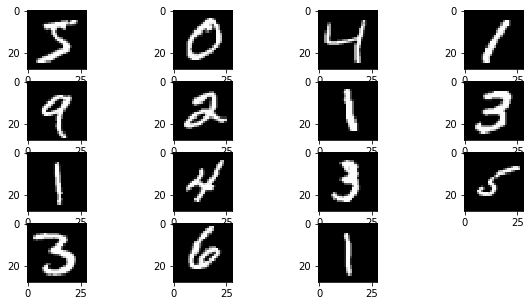

In [4]:
#
# Anzeige von Beispielen der Daten
#
for i in range(15):
    plt.subplot(4,4,1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
#
# Anzeige der Labels zu den Daten
#
for i in range(15):
    print('label {}'.format(y_train[i]))

label 5
label 0
label 4
label 1
label 9
label 2
label 1
label 3
label 1
label 4
label 3
label 5
label 3
label 6
label 1


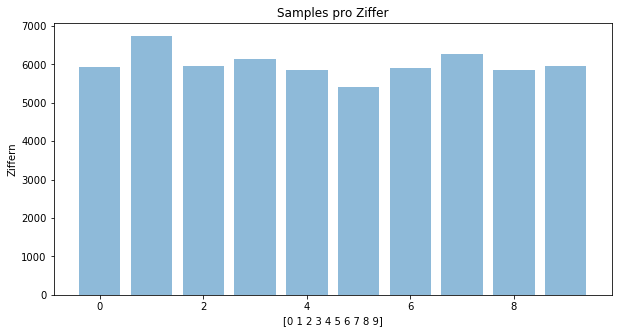

In [6]:
#
# Histogramm der Klassen (Ziffern)
#
#
# Prüfen der Verteilung der Klassen
#
df = pd.DataFrame(y_train,columns=['class'])
counts= df.groupby('class').size()

class_pos = np.arange(10)
plt.bar(class_pos, counts, align='center', alpha=0.5)
plt.xlabel(class_pos)
plt.ylabel('Ziffern')
plt.title('Samples pro Ziffer')
plt.show()

In [7]:
# 
# Ändere die Matrixform der Daten
#
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [8]:
# 
# Ändere Pixelwerte von 0..255 auf einen Wert zwischen 0 und 1 in Flieskommaform
#
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
# 
# Ändere die Zielwerte für die Klassifizierung (eine Vektorstelle pro Klasse)
#
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Erstes Modell

In [10]:
#
# Aufbau eines CNN Modelles mit einer CNN Schicht
#
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, batch_size=64, epochs=5 )

Epoch 1/5
60000/60000 [==============================] - 35s 580us/step - loss: 0.1543 - accuracy: 0.9526
Epoch 2/5
60000/60000 [==============================] - 35s 585us/step - loss: 0.0497 - accuracy: 0.9845
Epoch 3/5
60000/60000 [==============================] - 35s 590us/step - loss: 0.0323 - accuracy: 0.9898
Epoch 4/5
60000/60000 [==============================] - 33s 555us/step - loss: 0.0212 - accuracy: 0.9931
Epoch 5/5
60000/60000 [==============================] - 33s 549us/step - loss: 0.0138 - accuracy: 0.9957


In [13]:
model.predict(x_train[:1])

array([[5.7300369e-15, 7.0864000e-12, 1.3030981e-14, 7.7928824e-05,
        2.3786316e-16, 9.9992204e-01, 5.1150893e-11, 3.4366948e-16,
        1.0885139e-09, 3.6471595e-09]], dtype=float32)

In [14]:
y_train[:1]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [15]:
#
# Messen der Accuracy
#
_, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy {:.5f}'.format(acc))

Accuracy 0.98430


In [16]:
#
# Abschätzen der Fehler im Einsatz
#
print('Bei {} Samples sind rund {:.0f} Fehler zu erwarten.'.format( x_test.shape[0], (x_test.shape[0]*(1-acc))))

Bei 10000 Samples sind rund 157 Fehler zu erwarten.


# Verbesserung des Modelles

In [35]:
#
# Definition eines verbesserten Modelles mit folgenden Änderungen
# 1) weiterer convolutional layer
# 2) Vergrößerung der Filter
# 3) Vergrößerung des fully connected layers auf 256
# 4) Verlängerung des Trainings
#
model2 = Sequential()
model2.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model2.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model2.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform'))
model2.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(10, activation='softmax'))

In [36]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model2.fit(x_train, y_train, batch_size=64, epochs=15 )

Epoch 1/15
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1175 - accuracy: 0.9646
Epoch 2/15
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0386 - accuracy: 0.9879
Epoch 3/15
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0247 - accuracy: 0.9921
Epoch 4/15
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0184 - accuracy: 0.9940
Epoch 5/15
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0137 - accuracy: 0.9955
Epoch 6/15
60000/60000 [==============================] - 78s 1ms/step - loss: 0.0131 - accuracy: 0.9956
Epoch 7/15
60000/60000 [==============================] - 79s 1ms/step - loss: 0.0104 - accuracy: 0.9965
Epoch 8/15
60000/60000 [==============================] - 70s 1ms/step - loss: 0.0080 - accuracy: 0.9976
Epoch 9/15
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0067 - accuracy: 0.9981
Epoch 10/15
60000/60000 [==============================

In [38]:
#
# Messen der Accuracy
#
_, acc = model2.evaluate(x_test, y_test, verbose=0)
print('Accuracy {:.5f}'.format(acc))

Accuracy 0.99110


In [39]:
#
# Abschätzen der Fehler im Einsatz
#
print('Bei {} Samples sind rund {:.0f} Fehler zu erwarten.'.format( x_test.shape[0], (x_test.shape[0]*(1-acc))))

Bei 10000 Samples sind rund 89 Fehler zu erwarten.


In [44]:
#
# Ausgabe des Trainingsverlaufes
#
def summarize_diagnostics(history,modelname):
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.subplots_adjust(hspace=0.5)
    plt.savefig( 'results/' + modelname + '_plot.png')
    plt.show()
    plt.close()

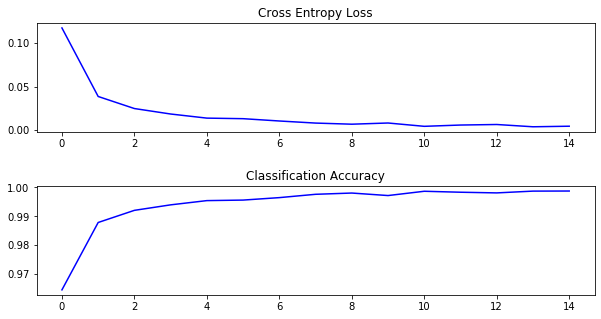

In [45]:
summarize_diagnostics(history,'04_model2')

# Speichern des Modelles

In [47]:
#
# Speichern des Modelles für später
#
from keras.models import model_from_json
prefix = 'results/04_'
modelName = prefix + "model.json"
weightName = prefix + "model.h5"

if True:
    model_json = model2.to_json()
    with open( modelName , "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model2.save_weights( weightName )
    print("saved model to disk as {} {}".format(modelName,weightName))



saved model to disk as results/04_model.json results/04_model.h5


# Test des Modelles und Untersuchung der Fehler

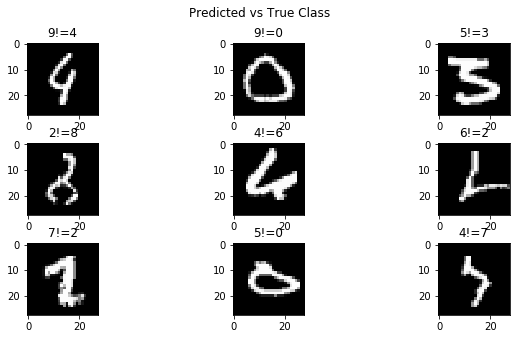

Anzahl der gefundenen Fehler ist 89


In [49]:
#
# Anzeige von Beispielen der Daten die fehlschlagen
#
from numpy import argmax

plotCount = 0
errorCount = 0
errorCountDistribution = [0] * 10
fig = plt.figure()
fig.suptitle('Predicted vs True Class')

for i in range(x_test.shape[0]):
    
    correctClass = argmax(y_test[i])
    image = x_test[i].reshape((1,28,28,1))
    prediction = model2.predict_classes([image])
    predictedClass = prediction[0]
    
    if predictedClass != correctClass:
        
        errorCount+= 1
        errorCountDistribution[correctClass] = errorCountDistribution[correctClass] + 1
        
        if plotCount < 9:
            ax = plt.subplot(330 + 1 + plotCount)
            ax.set_title('{}!={}'.format ( str(predictedClass), str(correctClass)))     
            image = x_test[i].reshape((28,28))
            plt.imshow(image, cmap=plt.get_cmap('gray'))    
            plotCount+= 1
        

plt.subplots_adjust(wspace=0.4,hspace=0.4)
plt.show()
print('Anzahl der gefundenen Fehler ist {}'.format(errorCount))

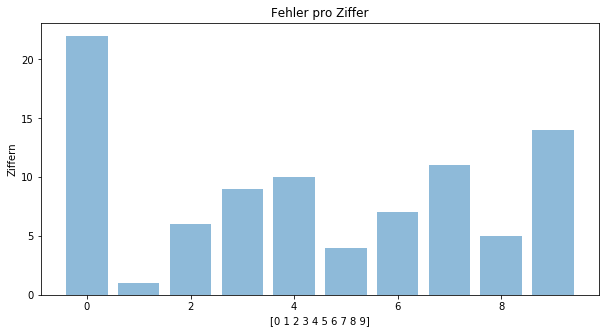

In [50]:
class_pos = np.arange(10)
plt.bar(class_pos, errorCountDistribution, align='center', alpha=0.5)
plt.xlabel(class_pos)
plt.ylabel('Ziffern')
plt.title('Fehler pro Ziffer')
plt.show()

# Testen mit eigenen Daten

In [25]:
# 
# Laden weiterer Funktionen
#
from PIL import Image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [26]:
# Funktion für das Laden eines Bildes aus einer Datei
def load_image(filename):
    # load the image
    img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    img = img / 255.0
    return img

In [27]:
#
# Laden eines eigenen Bildes mit einer Ziffer (2,3,8,9)
#
image = load_image('data/3.png')

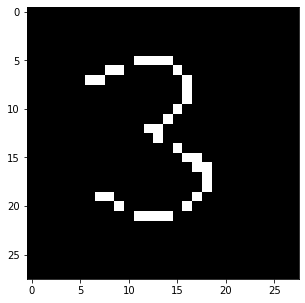

In [28]:
#
# Anzeige
#
imageShow = image.reshape((28,28))
plt.imshow(imageShow, cmap=plt.get_cmap('gray'))

In [29]:
prediction = model2.predict_classes([image])
predictedClass = prediction[0]

In [30]:
print('Die geschätzte Ziffer ist {}'.format(predictedClass) )

Die geschätzte Ziffer ist 3


In [31]:
prediction = model2.predict([image])

In [32]:
print(prediction)

[[4.1667261e-07 8.6081827e-06 5.7734742e-05 9.9873596e-01 1.1852195e-06
  1.0159735e-05 1.1881303e-06 9.1856398e-04 2.4680057e-06 2.6374735e-04]]


In [34]:
print('confidence {:.4f}'.format(prediction[0][3]))

confidence 0.9987
